In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

!pwd
os.chdir('/content/gdrive/MyDrive/major1')
!pwd

/content/gdrive/My Drive/major1
/content/gdrive/MyDrive/major1


In [ ]:


import numpy as np 
import pandas as pd # data processing, CSV file I/O 


import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/major1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/content/gdrive/MyDrive/major1/allergies.csv
/content/gdrive/MyDrive/major1/payers.csv
/content/gdrive/MyDrive/major1/patients.csv
/content/gdrive/MyDrive/major1/imaging_studies.csv
/content/gdrive/MyDrive/major1/providers.csv
/content/gdrive/MyDrive/major1/conditions.csv
/content/gdrive/MyDrive/major1/immunizations.csv
/content/gdrive/MyDrive/major1/procedures.csv
/content/gdrive/MyDrive/major1/medications.csv
/content/gdrive/MyDrive/major1/encounters.csv
/content/gdrive/MyDrive/major1/observations.csv
/content/gdrive/MyDrive/major1/model_ma.sav
/content/gdrive/MyDrive/major1/Merged.csv
/content/gdrive/MyDrive/major1/Final_Merged.csv


In [ ]:
df_patients = pd.read_csv("/content/gdrive/MyDrive/major1/patients.csv")
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,00185faa-2760-4218-9bf5-db301acf8274,18-11-2003,NaN,Eusebio566,Wyman904,NaN,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36
1,0042862c-9889-4a2e-b782-fac1e540ecb4,26-11-2009,NaN,Dewitt635,Feest103,NaN,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76
2,0047123f-12e7-486c-82df-53b3a450e365,20-01-1960,NaN,Jordon466,Harber290,M,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77
3,010d4a3a-2316-45ed-ae15-16f01c611674,31-05-1998,NaN,Patrick786,Hettinger594,NaN,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40
4,01207ecd-9dff-4754-8887-4652eda231e2,15-05-2019,NaN,Karyn217,Mueller846,NaN,white,nonhispanic,F,Colrain,Massachusetts,Franklin County,26400.00,774.96


In [ ]:
df_patients.dtypes
df_patients['BIRTHDATE'] = pd.to_datetime(df_patients['BIRTHDATE'])

In [ ]:
df_patients['BIRTHDATE']

0      2003-11-18
1      2009-11-26
2      1960-01-20
3      1998-05-31
4      2019-05-15
          ...    
1166   1999-01-09
1167   1997-05-20
1168   1977-06-27
1169   1966-02-11
1170   2016-06-13
Name: BIRTHDATE, Length: 1171, dtype: datetime64[ns]

In [ ]:
df_patients.dtypes

Id                             object
BIRTHDATE              datetime64[ns]
DEATHDATE                      object
FIRST                          object
LAST                           object
MARITAL                        object
RACE                           object
ETHNICITY                      object
GENDER                         object
CITY                           object
STATE                          object
COUNTY                         object
HEALTHCARE_EXPENSES           float64
HEALTHCARE_COVERAGE           float64
dtype: object

In [ ]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
df_patients["BIRTHDATE"] = pd.to_datetime(df_patients["BIRTHDATE"])

df_patients["age"] = df_patients["BIRTHDATE"].apply(lambda x : (pd.datetime.now().year - x.year))

<ipython-input-111-99218fcf568b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_patients["age"] = df_patients["BIRTHDATE"].apply(lambda x : (pd.datetime.now().year - x.year))


In [ ]:
df_patients.drop('MARITAL', axis='columns', inplace=True)

In [ ]:
df_patients.drop(['FIRST', 'LAST'], axis = 1)

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,NaN,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,19
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,NaN,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,13
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,NaN,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,62
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,NaN,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,24
4,01207ecd-9dff-4754-8887-4652eda231e2,2019-05-15,NaN,white,nonhispanic,F,Colrain,Massachusetts,Franklin County,26400.00,774.96,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1166,ff02f237-fedb-453b-85b1-ebfc2609c312,1999-01-09,NaN,white,nonhispanic,M,Dover,Massachusetts,Norfolk County,548297.95,2920.64,23
1167,ff3714ac-c7e3-4910-905e-2a321eb28144,1997-05-20,NaN,white,nonhispanic,M,Belchertown,Massachusetts,Hampshire County,530003.98,3405.56,25
1168,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,1977-06-27,NaN,white,nonhispanic,F,Fall River,Massachusetts,Bristol County,994509.38,16754.77,45
1169,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,1966-02-11,06-01-2003,black,nonhispanic,F,Lynn,Massachusetts,Essex County,115095.69,7002.65,56


In [ ]:
df_patients.ETHNICITY.unique()
mylist = df_patients.RACE.unique()

In [ ]:

mylist

array(['white', 'black', 'asian', 'native', 'other'], dtype=object)

In [ ]:
df_patients['GENDER'].value_counts()

F    609
M    562
Name: GENDER, dtype: int64

In [ ]:

df_allergies = pd.read_csv("/content/gdrive/MyDrive/major1/allergies.csv")
df_allergies.head()

,START,STOP,PATIENT,DESCRIPTION
0,25-10-1982,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,Latex allergy
1,25-10-1982,NaN,76982e06-f8b8-4509-9ca3-65a99c8650fe,Shellfish allergy
2,25-01-2002,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,Allergy to mould
3,25-01-2002,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,Dander (animal) allergy
4,25-01-2002,NaN,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,Allergy to grass pollen


In [ ]:
df_conditions = pd.read_csv("/content/gdrive/MyDrive/major1/conditions.csv")
df_conditions.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder)
2,21-12-2017,NaN,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain
3,18-10-2018,NaN,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura
4,07-09-2019,NaN,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars


In [ ]:
df_immunizations = pd.read_csv("/content/gdrive/MyDrive/major1/immunizations.csv")
df_immunizations.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,140,Influenza seasonal injectable preservative ...,140.52
1,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,140,Influenza seasonal injectable preservative ...,140.52
2,2012-01-23T17:45:28Z,034e9e3b-2def-4559-bb2a-7850888ae060,e88bc3a9-007c-405e-aabc-792a38f4aa2b,140,Influenza seasonal injectable preservative ...,140.52
3,2011-11-26T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1923c698-accd-4d70-ba09-e1938f6e96d1,140,Influenza seasonal injectable preservative ...,140.52
4,2011-07-28T15:02:18Z,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,140,Influenza seasonal injectable preservative ...,140.52


In [ ]:
df_procedures = pd.read_csv("/content/gdrive/MyDrive/major1/procedures.csv")
df_procedures.head()

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-04-30T00:26:23Z,8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,6aa37300-d1b4-48e7-a2f8-5e0f70f48f38,169553002.0,Insertion of subcutaneous contraceptive,14896.56,NaN,NaN
1,2010-07-27T12:58:08Z,10339b10-3cd1-4ac3-ac13-ec26728cb592,dae2b7cb-1316-4b78-954f-fa610a6c6d0e,430193006.0,Medication Reconciliation (procedure),726.51,NaN,NaN
2,2010-11-20T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,7ff86631-0378-4bfc-92ce-1edd697eb18e,430193006.0,Medication Reconciliation (procedure),788.50,NaN,NaN
3,2011-02-07T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,b8f76eba-7795-4dcd-a544-f27ac2ef3d46,117015009.0,Throat culture (procedure),2070.44,195662009.0,Acute viral pharyngitis (disorder)
4,2011-04-19T03:04:34Z,f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,640837d9-845a-433c-9fad-47426664a69d,117015009.0,Throat culture (procedure),2479.39,195662009.0,Acute viral pharyngitis (disorder)


In [ ]:
df_medications = pd.read_csv("/content/gdrive/MyDrive/major1/medications.csv")
df_medications.head()

,START,STOP,PATIENT,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2012-10-14T15:06:37Z,2012-10-25T15:06:37Z,00185faa-2760-4218-9bf5-db301acf8274,Penicillin V Potassium 250 MG Oral Tablet,20.48,0.00,1,20.48,43878008.0,Streptococcal sore throat (disorder)
1,2017-12-21T15:06:37Z,2018-01-18T15:06:37Z,00185faa-2760-4218-9bf5-db301acf8274,Abuse-Deterrent 12 HR Oxycodone Hydrochloride ...,185.70,110.70,1,185.70,NaN,NaN
2,2018-05-18T15:06:37Z,2018-07-06T15:06:37Z,00185faa-2760-4218-9bf5-db301acf8274,Abuse-Deterrent 12 HR Oxycodone Hydrochloride ...,403.03,328.03,1,403.03,NaN,NaN
3,2018-08-05T15:06:37Z,2018-08-19T15:06:37Z,00185faa-2760-4218-9bf5-db301acf8274,Abuse-Deterrent 12 HR Oxycodone Hydrochloride ...,224.25,149.25,1,224.25,NaN,NaN
4,2018-10-18T15:06:37Z,2018-11-01T15:06:37Z,00185faa-2760-4218-9bf5-db301acf8274,Acetaminophen 325 MG / Oxycodone Hydrochloride...,818.96,743.96,1,818.96,NaN,NaN


In [ ]:

df_payers = pd.read_csv("/content/gdrive/MyDrive/major1/payers.csv")
df_payers.head()

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,REVENUE,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,141676.87,119449.83,1305000.0,...,0,556,0,280,0,223,0,25,0.362810,3348
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227,4756720.13,890394.37,7122250.0,...,0,13471,0,7383,0,2557,0,198,0.786223,29760
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323,3636994.03,1814967.93,20365500.0,...,0,6382,0,47611,0,7022,0,507,0.812137,84276
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799,716971.60,842531.43,118500200.0,...,1796,0,4985,12718,550,6832,195,281,0.911843,70308
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583,2741717.82,1431463.91,140652000.0,...,0,6159,0,15312,0,7520,0,307,0.907256,78768


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


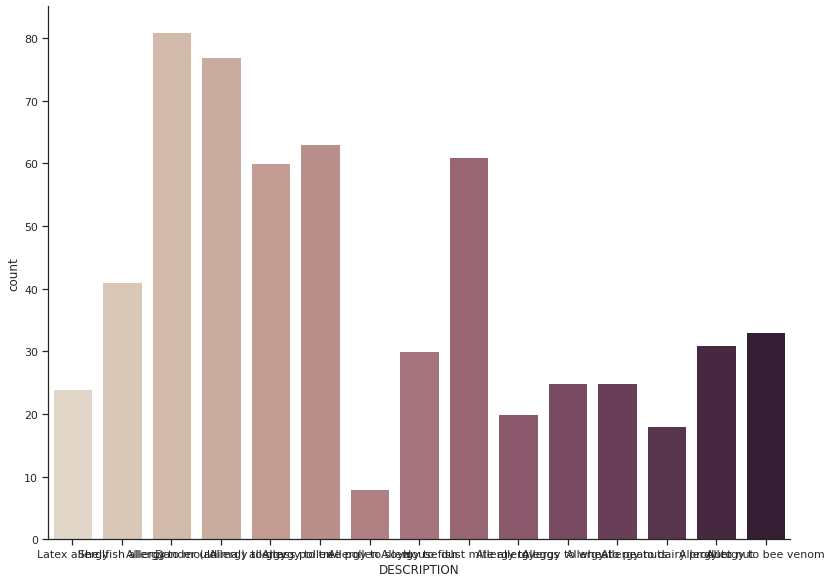

In [ ]:
sns.catplot(x="DESCRIPTION", kind="count", palette="ch:.25", data=df_allergies,height=8.27, aspect=11.7/8.27)

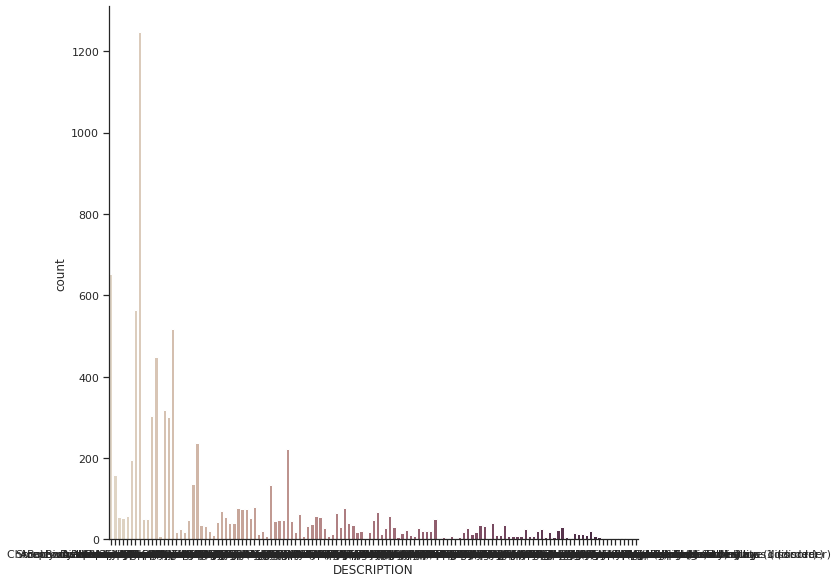

In [ ]:
sns.catplot(x="DESCRIPTION", kind="count", palette="ch:.25", data=df_conditions,height=8.27, aspect=11.7/8.27)

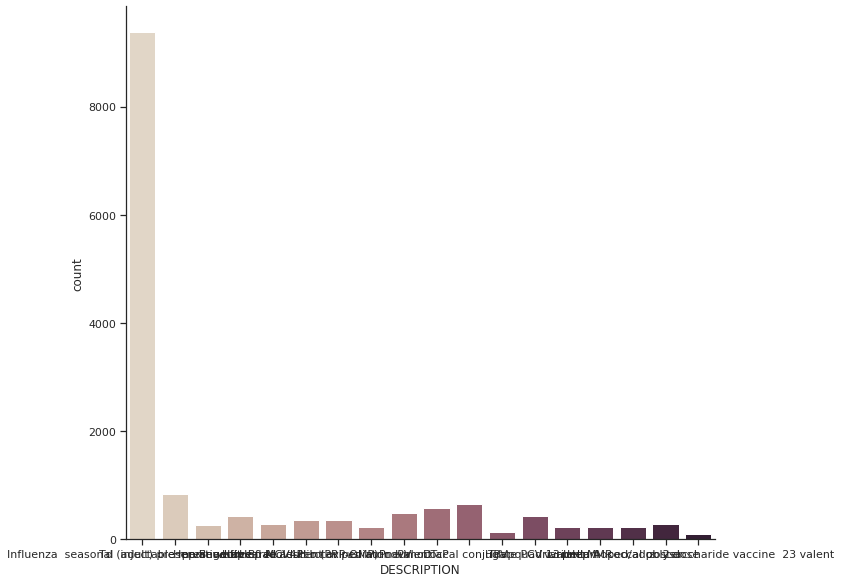

In [ ]:
sns.catplot(x="DESCRIPTION", kind="count", palette="ch:.25", data=df_immunizations,height=8.27, aspect=11.7/8.27)

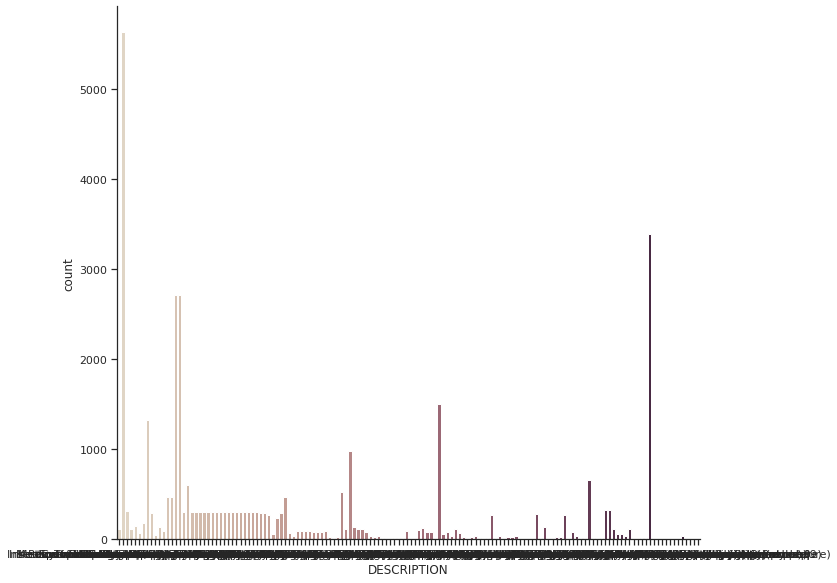

In [ ]:
sns.catplot(x="DESCRIPTION", kind="count", palette="ch:.25", data=df_procedures,height=8.27, aspect=11.7/8.27)

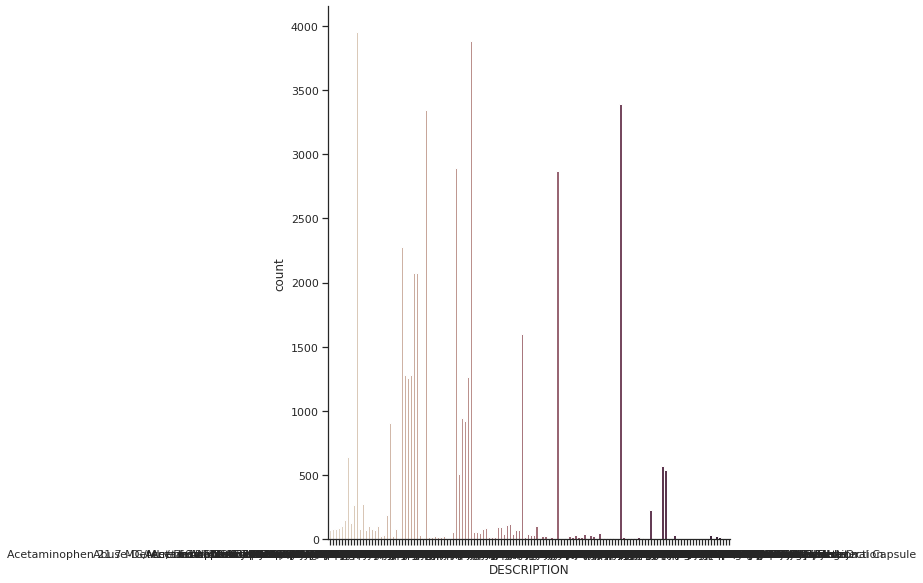

In [ ]:
sns.catplot(x="DESCRIPTION", kind="count", palette="ch:.25", data=df_medications,height=8.27, aspect=11.7/8.27)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Text(0, 0.5, 'Count of People')

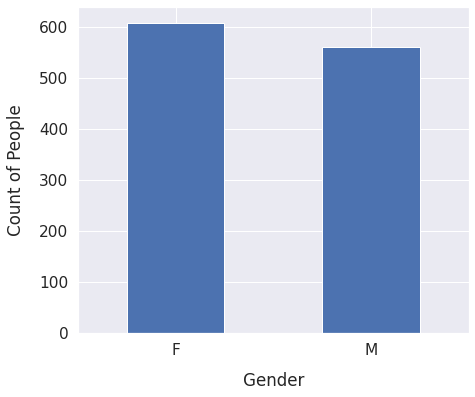

In [ ]:
sns.set(font_scale=1.4)
df_patients['GENDER'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)


Text(0, 0.5, 'Count of People')

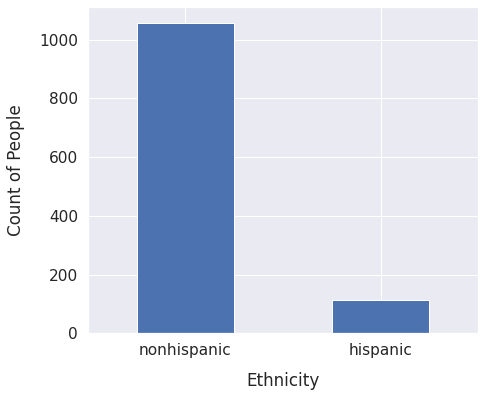

In [ ]:
sns.set(font_scale=1.4)
df_patients['ETHNICITY'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Ethnicity", labelpad=14)
plt.ylabel("Count of People", labelpad=14)


In [ ]:
df_patients['RACE'].value_counts()

white     965
black     101
asian      90
native     13
other       2
Name: RACE, dtype: int64

In [ ]:
state=df_patients.CITY.unique()
data=df_patients['CITY'].value_counts()
state

array(['Lynn', 'Boston', 'Middleton', 'Pittsfield', 'Colrain',
       'Northborough', 'Cambridge', 'Williamstown', 'Chatham', 'Gardner',
       'Somerville', 'Winchester', 'Norwood', 'Danvers', 'Weymouth',
       'Leverett', 'Southbridge', 'Southborough', 'Chicopee',
       'Longmeadow', 'Lowell', 'Hampden', 'Uxbridge', 'Haverhill',
       'Boxford', 'South Hadley', 'Northbridge', 'Holyoke', 'Braintree',
       'Worthington', 'Attleboro', 'Fitchburg', 'Carver', 'Wilmington',
       'Worcester', 'Lawrence', 'Gloucester', 'Waltham', 'Brockton',
       'New Bedford', 'Fall River', 'Sheffield', 'Sharon', 'Somerset',
       'Taunton', 'Methuen', 'Yarmouth', 'Salem', 'Franklin', 'Scituate',
       'Malden', 'Plymouth', 'Hanover', 'Westford', 'West Tisbury',
       'Webster', 'Falmouth', 'Wareham', 'Groveland', 'Barnstable',
       'Carlisle', 'Wayland', 'Halifax', 'New Ashford', 'Woburn',
       'Springfield', 'Natick', 'Athol', 'Norton', 'Revere',
       'Belchertown', 'Quincy', 'Fairhaven'

In [ ]:
df_con=pd.read_csv('/content/gdrive/MyDrive/major1/conditions.csv')
df_con.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder)
2,21-12-2017,NaN,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain
3,18-10-2018,NaN,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura
4,07-09-2019,NaN,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars


In [ ]:
df_con.shape

(8376, 6)

In [ ]:
df_con.drop('CODE', axis='columns')

,START,STOP,PATIENT,ENCOUNTER,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,Streptococcal sore throat (disorder)
2,21-12-2017,NaN,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,Chronic pain
3,18-10-2018,NaN,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,Chronic intractable migraine without aura
4,07-09-2019,NaN,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,Impacted molars
...,...,...,...,...,...
8371,09-06-2017,22-06-2017,ffcfa457-00c2-4405-9837-ac2781549c7e,7990f1f2-c931-4096-9141-bcbd52cd21df,Acute viral pharyngitis (disorder)
8372,06-05-2018,13-05-2018,ffcfa457-00c2-4405-9837-ac2781549c7e,ac3c0ad1-2e61-451a-a3a2-eaaca34f8283,Acute bronchitis (disorder)
8373,30-12-2018,20-01-2019,ffcfa457-00c2-4405-9837-ac2781549c7e,1c2c884f-491f-4df8-93c4-e5249b26650e,Sprain of wrist
8374,28-02-2019,20-05-2019,ffcfa457-00c2-4405-9837-ac2781549c7e,68424c9d-6978-4e7e-9cc2-1a585bfee43d,Otitis media


In [ ]:
df_con['STOP'] = df_con['STOP'].fillna(0)

In [ ]:
df_con.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder)
2,21-12-2017,0,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain
3,18-10-2018,0,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura
4,07-09-2019,0,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars


In [ ]:
list_my=[]
for x in df_con['STOP']:
    if(x==0):
        list_my.append(0)
    else:
        list_my.append(1)

In [ ]:
list2=[]
for i in range(8376):
    list2.append(1)
df_con['SCORE']=list_my
df_con['COUNT']=list2

In [ ]:
df_con.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,SCORE,COUNT
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder),1,1
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder),1,1
2,21-12-2017,0,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain,0,1
3,18-10-2018,0,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura,0,1
4,07-09-2019,0,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars,0,1


In [ ]:

# df_score.head()

df_score = df_con.groupby(['PATIENT'])['SCORE', 'COUNT'].sum().reset_index()

df_score

<ipython-input-142-e18aa0e429ab>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_score = df_con.groupby(['PATIENT'])['SCORE', 'COUNT'].sum().reset_index()


,PATIENT,SCORE,COUNT
0,00185faa-2760-4218-9bf5-db301acf8274,2,5
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4
2,0047123f-12e7-486c-82df-53b3a450e365,4,6
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9
...,...,...,...
1147,ff02f237-fedb-453b-85b1-ebfc2609c312,3,4
1148,ff3714ac-c7e3-4910-905e-2a321eb28144,3,6
1149,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,8,15
1150,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,4,8


In [ ]:
df_score

,PATIENT,SCORE,COUNT
0,00185faa-2760-4218-9bf5-db301acf8274,2,5
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4
2,0047123f-12e7-486c-82df-53b3a450e365,4,6
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9
...,...,...,...
1147,ff02f237-fedb-453b-85b1-ebfc2609c312,3,4
1148,ff3714ac-c7e3-4910-905e-2a321eb28144,3,6
1149,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,8,15
1150,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,4,8


In [ ]:
df_score['weight']=df_score['SCORE']/df_score['COUNT']  

In [ ]:
df_score.head()

,PATIENT,SCORE,COUNT,weight
0,00185faa-2760-4218-9bf5-db301acf8274,2,5,0.400000
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4,1.000000
2,0047123f-12e7-486c-82df-53b3a450e365,4,6,0.666667
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3,0.666667
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9,0.555556


In [ ]:
list3=[]
for x in df_score['weight']:
    if(x>=0.6):
        list3.append(1)
    else:
        list3.append(-1)
        


In [ ]:
df_score['adh']=list3

Text(0, 0.5, 'Count of People')

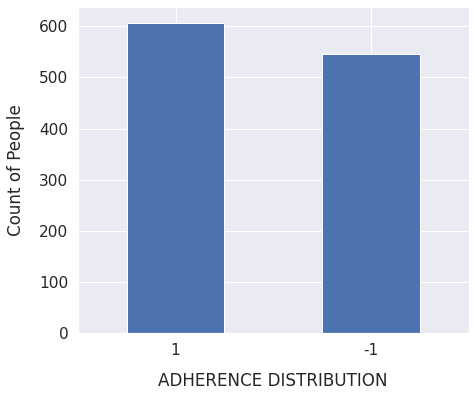

In [ ]:
sns.set(font_scale=1.4)
df_score['adh'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("ADHERENCE DISTRIBUTION", labelpad=14)
plt.ylabel("Count of People", labelpad=14)


In [ ]:
df_score.head()

,PATIENT,SCORE,COUNT,weight,adh
0,00185faa-2760-4218-9bf5-db301acf8274,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9,0.555556,-1


In [ ]:
df_score.columns = ['Id', 'SCORE', 'COUNT','WEIGHT','ADH']
df_score.head()

,Id,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9,0.555556,-1


In [ ]:
df = pd.merge(df_patients, df_score, on="Id")
print(df)

                                        Id  BIRTHDATE   DEATHDATE  \
0     00185faa-2760-4218-9bf5-db301acf8274 2003-11-18         NaN   
1     0042862c-9889-4a2e-b782-fac1e540ecb4 2009-11-26         NaN   
2     0047123f-12e7-486c-82df-53b3a450e365 1960-01-20         NaN   
3     010d4a3a-2316-45ed-ae15-16f01c611674 1998-05-31         NaN   
4     0149d553-f571-4e99-867e-fcb9625d07c2 1979-06-21         NaN   
...                                    ...        ...         ...   
1147  ff02f237-fedb-453b-85b1-ebfc2609c312 1999-01-09         NaN   
1148  ff3714ac-c7e3-4910-905e-2a321eb28144 1997-05-20         NaN   
1149  ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be 1977-06-27         NaN   
1150  ffa37e71-fa14-4e84-ba9d-aece8d1d99f9 1966-02-11  06-01-2003   
1151  ffcfa457-00c2-4405-9837-ac2781549c7e 2016-06-13         NaN   

             FIRST          LAST   RACE    ETHNICITY GENDER          CITY  \
0       Eusebio566      Wyman904  white  nonhispanic      M          Lynn   
1        Dewitt63

In [ ]:
df.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,NaN,Eusebio566,Wyman904,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,19,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,NaN,Dewitt635,Feest103,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,13,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,NaN,Jordon466,Harber290,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,62,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,NaN,Patrick786,Hettinger594,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,24,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,1979-06-21,NaN,Sophie40,Kessler503,white,hispanic,F,Northborough,Massachusetts,Worcester County,911327.42,6713.48,43,5,9,0.555556,-1


In [ ]:
df.shape

(1152, 18)

In [ ]:
df.to_csv('Merged.csv')

In [ ]:
df.drop(['FIRST', 'LAST','STATE'], axis = 1)

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER,CITY,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,NaN,white,nonhispanic,M,Lynn,Essex County,360851.05,9863.36,19,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,NaN,white,nonhispanic,M,Boston,Suffolk County,20006.08,1240.76,13,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,NaN,black,nonhispanic,M,Middleton,Essex County,185715.36,7108.77,62,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,NaN,white,nonhispanic,M,Pittsfield,Berkshire County,504727.10,3346.40,24,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,1979-06-21,NaN,white,hispanic,F,Northborough,Worcester County,911327.42,6713.48,43,5,9,0.555556,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,ff02f237-fedb-453b-85b1-ebfc2609c312,1999-01-09,NaN,white,nonhispanic,M,Dover,Norfolk County,548297.95,2920.64,23,3,4,0.750000,1
1148,ff3714ac-c7e3-4910-905e-2a321eb28144,1997-05-20,NaN,white,nonhispanic,M,Belchertown,Hampshire County,530003.98,3405.56,25,3,6,0.500000,-1
1149,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,1977-06-27,NaN,white,nonhispanic,F,Fall River,Bristol County,994509.38,16754.77,45,8,15,0.533333,-1
1150,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,1966-02-11,06-01-2003,black,nonhispanic,F,Lynn,Essex County,115095.69,7002.65,56,4,8,0.500000,-1


In [ ]:
df['DEATHDATE'] = pd.to_datetime(df['DEATHDATE'])

In [ ]:
df['DEATHDATE'] = df['DEATHDATE'].fillna(0)

In [ ]:
df.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,0,Eusebio566,Wyman904,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,19,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,0,Dewitt635,Feest103,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,13,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,0,Jordon466,Harber290,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,62,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,0,Patrick786,Hettinger594,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,24,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,1979-06-21,0,Sophie40,Kessler503,white,hispanic,F,Northborough,Massachusetts,Worcester County,911327.42,6713.48,43,5,9,0.555556,-1


In [ ]:
listd=[]
for x in df['DEATHDATE']:
    if(x==0):
        listd.append(1)
    else:
        listd.append(pd.datetime.now().year - x.year)

<ipython-input-159-9358e8b02a2b>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  listd.append(pd.datetime.now().year - x.year)


In [ ]:
print(listd)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 17, 54, 15, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 16, 1, 1, 1, 1, 1, 13, 1, 1, 1, 23, 12, 9, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 21, 1, 1, 1, 1, 1, 1, 27, 1, 47, 1, 45, 1, 1, 1, 1, 1, 1, 1, 1, 20, 1, 1, 1, 1, 32, 1, 1, 27, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 45, 24, 1, 8, 1, 6, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 8, 1, 1, 1, 16, 1, 23, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 95, 1, 1, 1, 1, 1, 1, 1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 25, 17, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 46, 36, 1, 1, 1, 1, 64, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 18, 1, 1, 4, 18, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 70, 1, 1, 1, 1, 19, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 33, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 33, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
listdd=[]
for x in df['age']:
    listdd.append(x)

In [ ]:
print(listdd)

[19, 13, 62, 24, 43, 55, 100, 72, 31, 80, 61, 100, 39, 75, 43, 20, 61, 69, 71, 25, 50, 23, 71, 50, 41, 21, 21, 7, 75, 64, 66, 52, 71, 63, 83, 49, 69, 62, 69, 19, 83, 24, 40, 65, 80, 72, 31, 14, 7, 36, 36, 33, 13, 12, 67, 31, 19, 38, 61, 29, 29, 25, 13, 14, 67, 56, 55, 24, 25, 16, 64, 32, 30, 32, 74, 35, 40, 36, 19, 109, 29, 74, 50, 22, 23, 7, 81, 7, 111, 71, 108, 44, 76, 18, 54, 50, 80, 28, 68, 73, 19, 19, 41, 33, 67, 45, 64, 68, 87, 12, 58, 45, 40, 42, 34, 36, 5, 92, 108, 52, 34, 74, 17, 80, 13, 29, 76, 28, 16, 72, 37, 95, 60, 34, 38, 68, 69, 8, 33, 55, 82, 34, 108, 19, 20, 30, 24, 38, 45, 6, 61, 83, 12, 13, 47, 71, 64, 29, 4, 4, 26, 97, 5, 99, 25, 45, 51, 105, 4, 64, 13, 22, 8, 14, 35, 14, 53, 17, 48, 80, 15, 61, 18, 17, 40, 29, 18, 54, 58, 22, 5, 31, 29, 68, 80, 52, 81, 57, 79, 99, 53, 18, 80, 71, 7, 59, 48, 27, 45, 5, 17, 89, 71, 45, 64, 10, 44, 82, 59, 57, 71, 54, 22, 44, 51, 60, 47, 48, 5, 18, 55, 42, 81, 38, 49, 52, 24, 70, 36, 57, 79, 29, 9, 16, 77, 16, 29, 86, 94, 105, 76, 31,

In [ ]:
df.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,0,Eusebio566,Wyman904,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,19,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,0,Dewitt635,Feest103,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,13,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,0,Jordon466,Harber290,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,62,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,0,Patrick786,Hettinger594,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,24,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,1979-06-21,0,Sophie40,Kessler503,white,hispanic,F,Northborough,Massachusetts,Worcester County,911327.42,6713.48,43,5,9,0.555556,-1


In [ ]:
Output=[]
for i in range(len(listd)):
    if listd[i]==1:
        Output.append(100000)
    else:
        Output.append(listdd[i]-listd[i])


In [ ]:
print(Output)

[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 63, 7, 85, 100000, 67, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 65, 100000, 100000, 100000, 100000, 100000, 56, 100000, 100000, 100000, 100000, 100000, 67, 100000, 100000, 100000, 100000, 100000, 70, 100000, 100000, 100000, 57, 60, 22, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 62, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 88, 100000, 100000, 100000, 100000, 100000, 100000, 54, 100000, 64, 100000, 63, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 53, 100000, 100000, 100000, 100000, 35, 100000, 100000, 41, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 63, 28, 100000, 66, 100000, 74, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 91, 100000, 100000, 100000, 100000, 61, 1000

In [ ]:
lifespan=[]
for x in Output:
    if(x<75):
        lifespan.append(-1) #LIFESPAN BAD
    else:
        lifespan.append(1) #LIFESPAN GOOD
       

In [ ]:
print(lifespan)

[1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1,

In [ ]:
df['Life Span']=lifespan

In [ ]:
df.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,SCORE,COUNT,WEIGHT,ADH,Life Span
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,0,Eusebio566,Wyman904,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,19,2,5,0.400000,-1,1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,0,Dewitt635,Feest103,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,13,4,4,1.000000,1,1
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,0,Jordon466,Harber290,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,62,4,6,0.666667,1,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,0,Patrick786,Hettinger594,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,24,2,3,0.666667,1,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,1979-06-21,0,Sophie40,Kessler503,white,hispanic,F,Northborough,Massachusetts,Worcester County,911327.42,6713.48,43,5,9,0.555556,-1,1


Text(0, 0.5, 'Count of People')

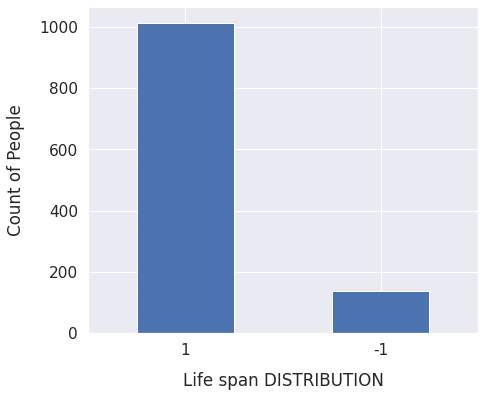

In [ ]:
sns.set(font_scale=1.4)
df['Life Span'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Life span DISTRIBUTION", labelpad=14)
plt.ylabel("Count of People", labelpad=14)

In [ ]:
my_df=df.drop(['BIRTHDATE', 'DEATHDATE','STATE','FIRST','LAST','SCORE', 'COUNT','WEIGHT'], axis = 1)

In [ ]:
my_df.to_csv('Final_Merged.csv')

In [ ]:
my_df.shape

(1152, 11)

In [ ]:
final_df=pd.read_csv('./Final_Merged.csv')
final_df.head()


,Unnamed: 0,Id,RACE,ETHNICITY,GENDER,CITY,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,ADH,Life Span
0,0,00185faa-2760-4218-9bf5-db301acf8274,white,nonhispanic,M,Lynn,Essex County,360851.05,9863.36,19,-1,1
1,1,0042862c-9889-4a2e-b782-fac1e540ecb4,white,nonhispanic,M,Boston,Suffolk County,20006.08,1240.76,13,1,1
2,2,0047123f-12e7-486c-82df-53b3a450e365,black,nonhispanic,M,Middleton,Essex County,185715.36,7108.77,62,1,1
3,3,010d4a3a-2316-45ed-ae15-16f01c611674,white,nonhispanic,M,Pittsfield,Berkshire County,504727.10,3346.40,24,1,1
4,4,0149d553-f571-4e99-867e-fcb9625d07c2,white,hispanic,F,Northborough,Worcester County,911327.42,6713.48,43,-1,1


In [ ]:
final_df.shape

(1152, 12)

In [ ]:
#final_df.columns

In [ ]:
final_df=final_df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
final_df=final_df.drop(['Id'], axis = 1)

In [ ]:
final_df.columns

Index(['RACE', 'ETHNICITY', 'GENDER', 'CITY', 'COUNTY', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'age', 'ADH', 'Life Span'],
      dtype='object')

In [ ]:
import seaborn as sb

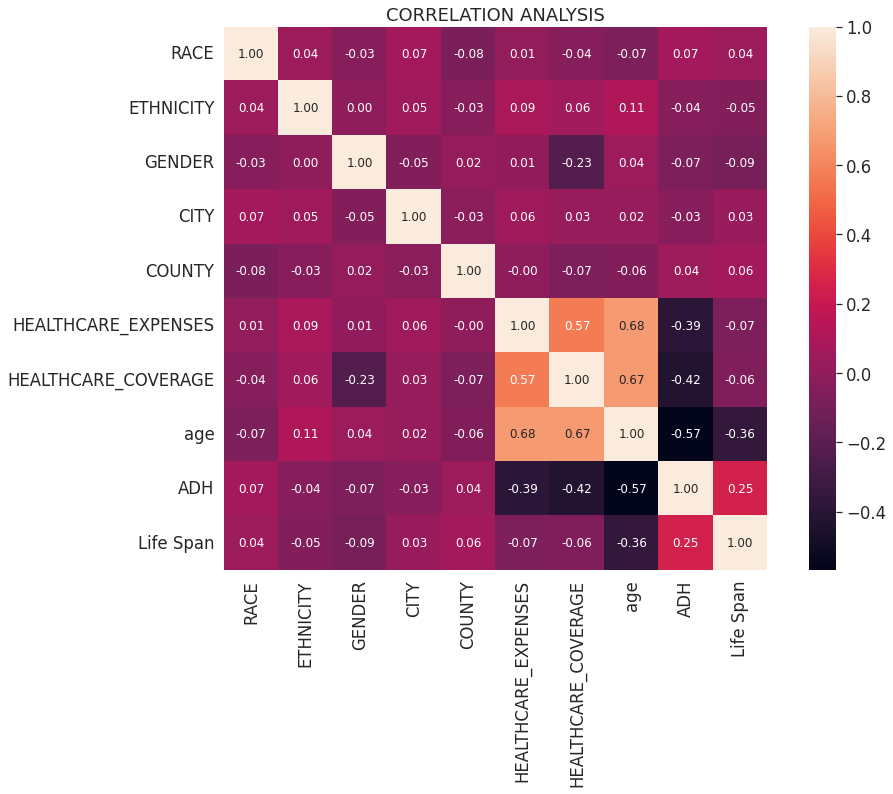

In [ ]:
from pylab import rcParams
cols=['RACE', 'ETHNICITY', 'GENDER', 'CITY', 'COUNTY', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'age', 'ADH', 'Life Span']
cor_mat=np.corrcoef(final_df[cols].values.T)
sb.set(font_scale=1.5)
rcParams['figure.figsize']=(15,10)
heat_map=sb.heatmap(cor_mat,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':12},yticklabels=cols,xticklabels=cols)
plt.title('CORRELATION ANALYSIS')
plt.show()

<ipython-input-185-1f99322e4dbd>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  final_df.hist(ax = ax)


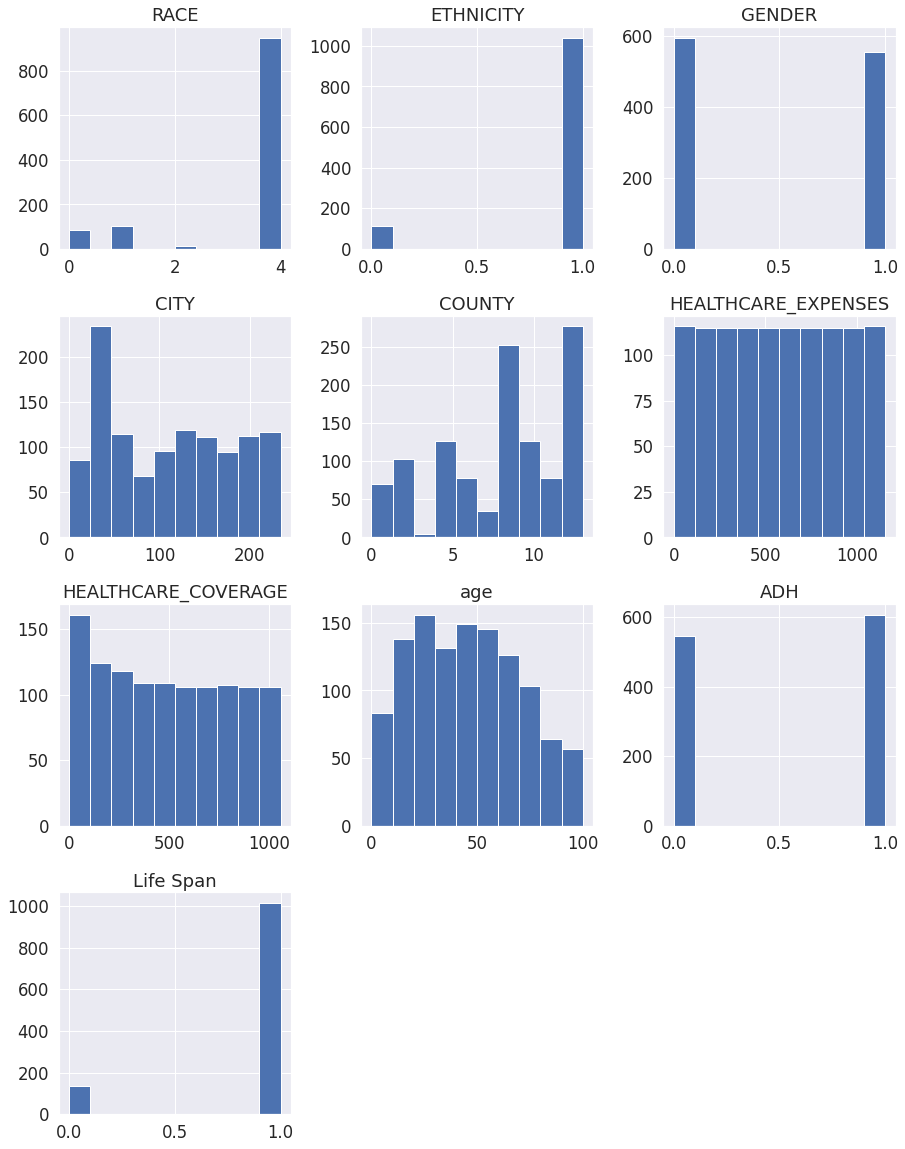

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
final_df.hist(ax = ax)
plt.show()

In [ ]:
final_df = final_df.apply(LabelEncoder().fit_transform)

In [ ]:
new_cols = ['RACE', 'ETHNICITY', 'GENDER', 'CITY', 'COUNTY', 'HEALTHCARE_EXPENSES',
       'HEALTHCARE_COVERAGE', 'age', 'Life Span','ADH']
final_df=final_df[new_cols]

In [ ]:
final_df.head()

,RACE,ETHNICITY,GENDER,CITY,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,Life Span,ADH
0,4,1,1,111,4,360,727,17,1,0
1,4,1,1,24,12,36,35,11,1,1
2,1,1,1,128,4,235,576,60,1,1
3,4,1,1,159,1,437,247,22,1,1
4,4,0,0,148,13,660,543,41,1,0


In [ ]:
final1df=final_df

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
labelencoder = LabelEncoder()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
array=final_df.values
X=final_df.iloc[:,0:9]
Y=final_df.iloc[:,9]
test = SelectKBest(score_func=chi2, k=8)

fit=test.fit(X,Y)

dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

impfeature_Scores=pd.concat([dfcolumns,dfscores],axis=1)
impfeature_Scores.columns=['feature','Score']

impfeature_Scores=impfeature_Scores.sort_values('Score',ascending=False)
print(impfeature_Scores)

               feature         Score
6  HEALTHCARE_COVERAGE  41867.476000
5  HEALTHCARE_EXPENSES  33362.287177
7                  age   5319.618106
3                 CITY     50.363385
8            Life Span      8.633113
4               COUNTY      4.078508
2               GENDER      2.875045
0                 RACE      2.428698
1            ETHNICITY      0.188260


In [ ]:
ifeature=impfeature_Scores.iloc[0:8,:]
print(ifeature)
columnname=ifeature["feature"].tolist()
print(columnname)

               feature         Score
6  HEALTHCARE_COVERAGE  41867.476000
5  HEALTHCARE_EXPENSES  33362.287177
7                  age   5319.618106
3                 CITY     50.363385
8            Life Span      8.633113
4               COUNTY      4.078508
2               GENDER      2.875045
0                 RACE      2.428698
['HEALTHCARE_COVERAGE', 'HEALTHCARE_EXPENSES', 'age', 'CITY', 'Life Span', 'COUNTY', 'GENDER', 'RACE']


In [ ]:
columnname.append("ADH")
newdata=final_df[columnname]

In [ ]:
newdata.head(10)

,HEALTHCARE_COVERAGE,HEALTHCARE_EXPENSES,age,CITY,Life Span,COUNTY,GENDER,RACE,ADH
0,727,360,17,111,1,4,1,4,0
1,35,36,11,24,1,12,1,4,1
2,576,235,60,128,1,4,1,1,1
3,247,437,22,159,1,1,1,4,1
4,543,660,41,148,1,13,0,4,0
5,910,731,53,111,1,4,0,4,1
6,1001,1097,92,33,1,8,0,0,0
7,1022,283,70,225,1,1,0,4,1
8,135,595,29,111,1,4,1,4,1
9,913,248,78,37,0,0,1,2,0


In [ ]:
y = newdata['ADH']
X = newdata.drop(['ADH'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=31)

In [ ]:

print(len(X_train))
print(len(X_test))

921
231


<ipython-input-196-4b1189e0b98f>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  acc=pd.Series()


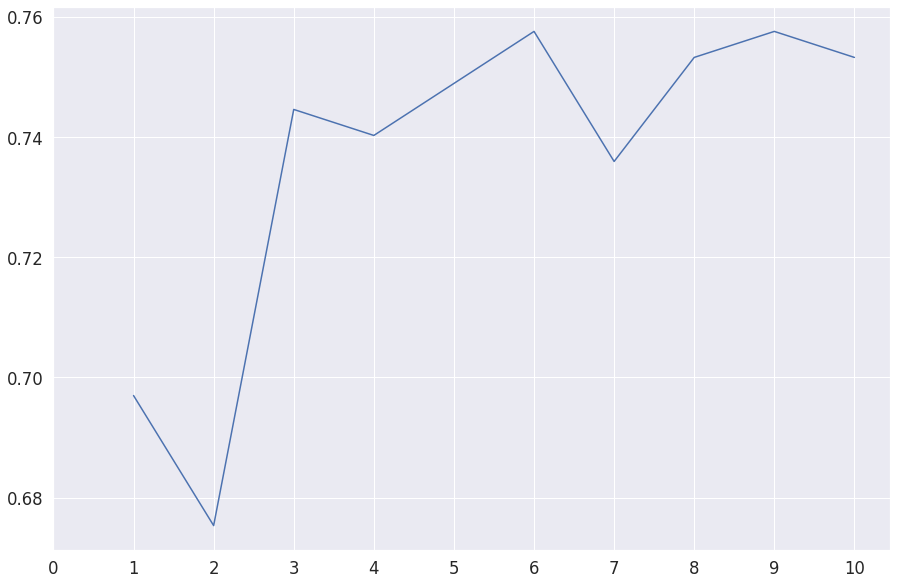

Accuracies for different values of n are: [0.6969697  0.67532468 0.74458874 0.74025974 0.74891775 0.75757576
 0.73593074 0.75324675 0.75757576 0.75324675]
KNearestNeighors performs best at n = 6  with a accuracy of  0.7575757575757576
[0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1
 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1
 0 0 1 1 1 0 0 0 1]
f1 score:  0.7575348627980207


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
acc_index=list(range(1,11))
acc=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    acc=acc.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(acc_index, acc)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',acc.values)
final_acc = list(acc.values)
print('KNearestNeighors performs best at n =',final_acc.index(max(final_acc))+1,' with a accuracy of ',max(final_acc))
best = final_acc.index(max(final_acc))+1
model=KNeighborsClassifier(n_neighbors=best) 
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print(prediction)

#f1 score

y_pred = model.predict(X_test)
f1=f1_score(y_pred, y_test, average='macro')
print('f1 score: ',f1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Random Forest Algorithm Accuracy Score : 77.49%
F1 score : 0.7739385727190605
0.77 accuracy with a standard deviation of 0.02


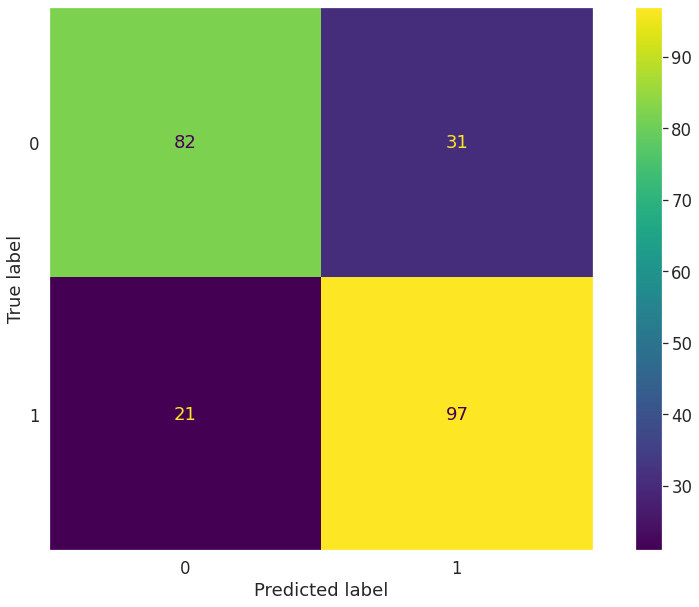

In [ ]:

# Random Forest Classification
accuracies = {}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
y_pred =rf.predict(X_test)

acc = rf.score(X_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))
f1 = f1_score(y_pred, y_test, average='macro')
print('F1 score :',f1)
scores = cross_val_score(rf, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()

Decision Tree Test Accuracy 68.40%
f1 score: 0.6838878995219795
0.68 accuracy with a standard deviation of 0.04


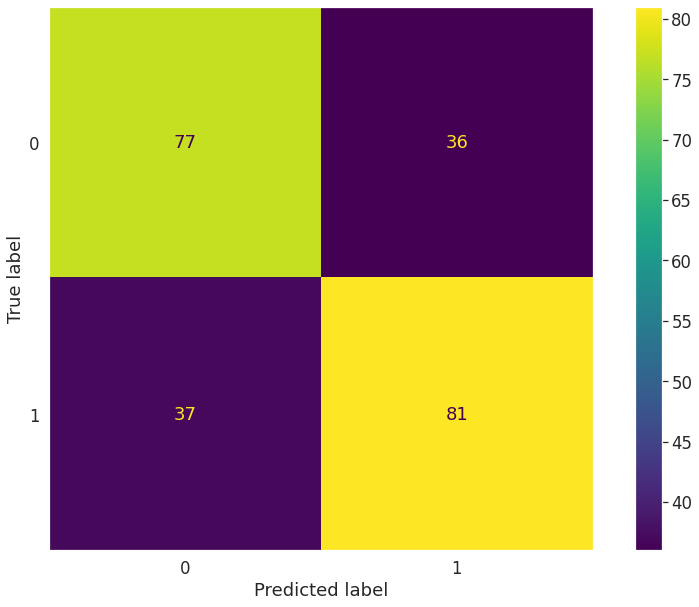

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
f1 = f1_score(y_pred, y_test, average='macro')

acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))
print('f1 score:',f1)
scores = cross_val_score(dtc, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()

Accuracy of Naive Bayes: 78.35%
f1 score :  0.7820754716981131
0.78 accuracy with a standard deviation of 0.02


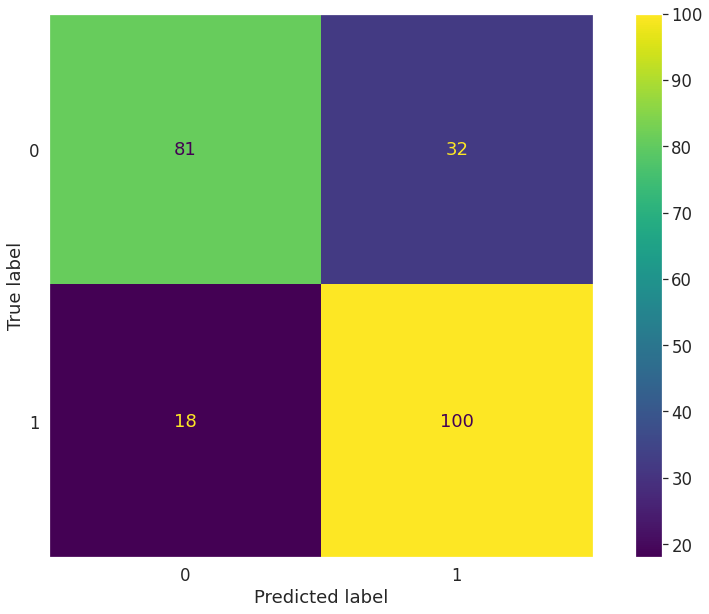

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
f1=f1_score(y_pred, y_test, average='macro')

acc = nb.score(X_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))
print('f1 score : ',f1)
scores = cross_val_score(nb, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()

Test Accuracy of SVM Algorithm: 76.19%
F1 score: 0.7601064934574497
0.75 accuracy with a standard deviation of 0.03


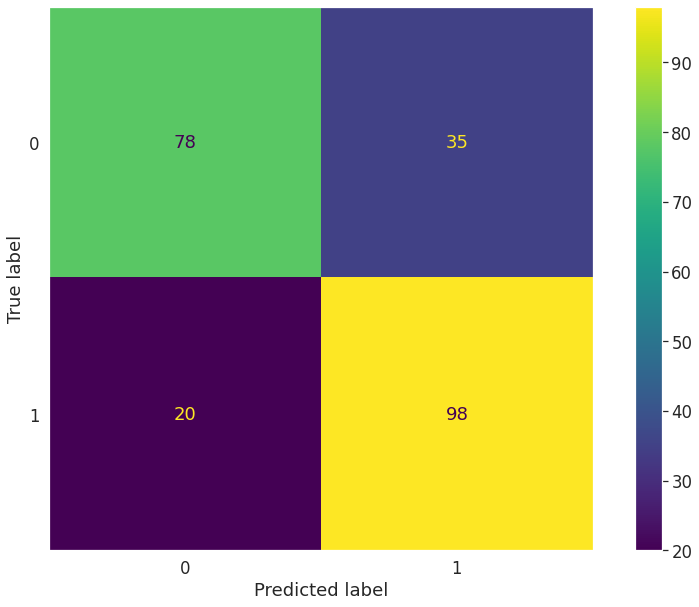

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
f1 = f1_score(y_pred, y_test, average='macro')

acc = svm.score(X_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))
print("F1 score:",f1)
scores = cross_val_score(svm, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

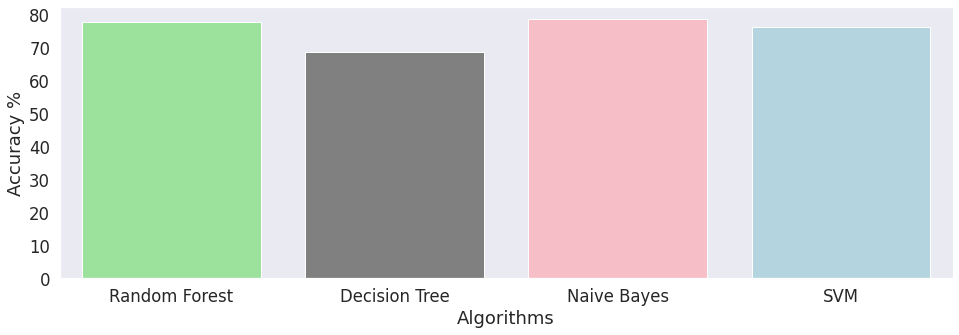

In [ ]:
colors = ["lightgreen", "gray", "lightpink", "lightblue", "yellow"]
sb.set_style("dark")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sb.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
data = {'Model':['Random Forest','Decision Tree','Naive Bayes','SVM'],
        'F1 Score':[0.7739, 0.6751, 0.7820, 0.7601],'Accuracies':[77.49,67.53,78.35,76.19],'cross-validated accuracy ':[0.77,0.68,0.78,0.75],'standard deviation':[0.02,0.04,0.02,0.02]}

# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

           Model  F1 Score  Accuracies  cross-validated accuracy   \
0  Random Forest    0.7739       77.49                       0.77   
1  Decision Tree    0.6751       67.53                       0.68   
2    Naive Bayes    0.7820       78.35                       0.78   
3            SVM    0.7601       76.19                       0.75   

   standard deviation  
0                0.02  
1                0.04  
2                0.02  
3                0.02  
